In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving email.csv to email.csv


In [3]:
df = pd.read_csv("email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.shape

(5573, 2)

In [5]:
df.isnull().sum()


,0
Category,0
Message,0


In [6]:
df = df.dropna(subset=["Category"])


In [7]:
df.isnull().sum()


,0
Category,0
Message,0


In [10]:
df = df[["Category", "Message"]]
df.columns = ["label", "message"]


In [11]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})


In [12]:
df = df.dropna(subset=["label"])


In [13]:
print(df[df["label"].isnull()])

Empty DataFrame
Columns: [label, message]
Index: []


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["message"], df["label"],
    test_size=0.2,
    random_state=42
)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

nb_pred = nb.predict(X_test_tfidf)
nb_acc = accuracy_score(y_test, nb_pred)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dense, y_train)

knn_pred = knn.predict(X_test_dense)
knn_acc = accuracy_score(y_test, knn_pred)


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

lr_pred = lr.predict(X_test_tfidf)
lr_acc = accuracy_score(y_test, lr_pred)


In [20]:
print("Naive Bayes Accuracy      :", nb_acc)
print("KNN Accuracy              :", knn_acc)
print("Logistic Regression Accuracy:", lr_acc)


Naive Bayes Accuracy      : 0.9829596412556054
KNN Accuracy              : 0.9219730941704036
Logistic Regression Accuracy: 0.9748878923766816


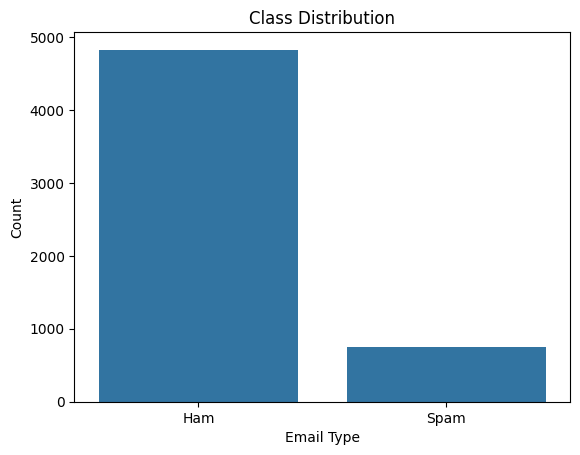

In [19]:
plt.figure()
sns.countplot(x=df["label"])
plt.xticks([0,1], ["Ham", "Spam"])
plt.title("Class Distribution")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()


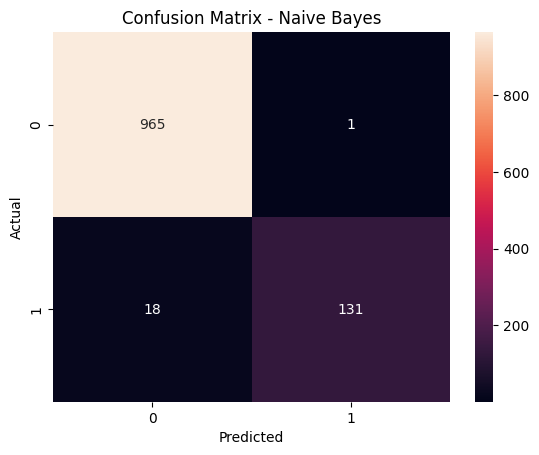

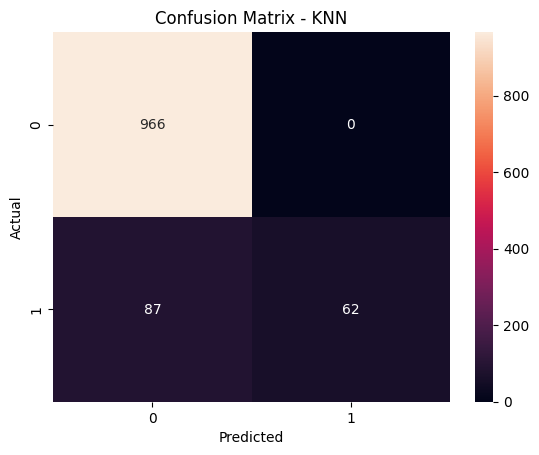

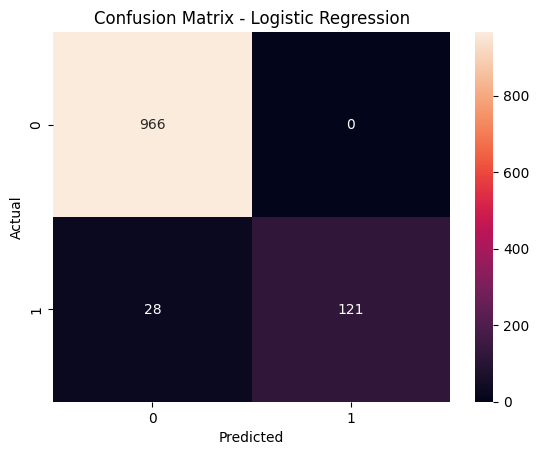

In [21]:
from sklearn.metrics import confusion_matrix

models = {
    "Naive Bayes": nb_pred,
    "KNN": knn_pred,
    "Logistic Regression": lr_pred
}

for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


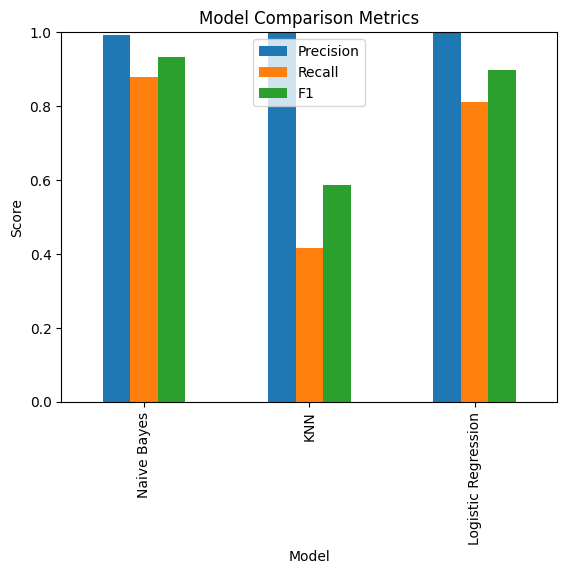

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    "Model": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

for name, pred in models.items():
    metrics["Model"].append(name)
    metrics["Precision"].append(precision_score(y_test, pred))
    metrics["Recall"].append(recall_score(y_test, pred))
    metrics["F1"].append(f1_score(y_test, pred))

metrics_df = pd.DataFrame(metrics)

metrics_df.plot(x="Model", kind="bar")
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()


naive bayes/logistic reg -supervisied